In [1]:
#EDA packages
import pandas as pd 
import numpy as np

In [2]:
import os
from scipy.stats import randint
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
#Data Viz packages
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("complaints.csv")

ParserError: Error tokenizing data. C error: out of memory

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-03-18,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with customer service,NaN,NaN,AMERICAN EXPRESS COMPANY,CA,95032.0,NaN,NaN,Web,2023-04-14,In progress,Yes,NaN,6708957
1,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,19111.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896030


In [8]:
df.shape

(3586489, 18)

In [9]:
df.head(2).T

,0,1
Date received,2023-03-18,2023-04-27
Product,Credit card or prepaid card,"Credit reporting, credit repair services, or o..."
Sub-product,General-purpose credit card or charge card,Credit reporting
Issue,"Other features, terms, or problems",Problem with a credit reporting company's inve...
Sub-issue,Problem with customer service,Their investigation did not fix an error on yo...
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,AMERICAN EXPRESS COMPANY,"EQUIFAX, INC."
State,CA,PA
ZIP code,95032.0,19111.0


In [10]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(1294168, 2)

In [11]:
df1.head(15)

,Product,Consumer_complaint
21,Student loan,I recently submitted a complaint about how my ...
22,Debt collection,XXXX XXXX XXXX ( XXXX ) is engaged in 1. bad-f...
25,Debt collection,I have disputed this item with the credit repo...
33,"Credit reporting, credit repair services, or o...",Hard inquiries are on my credit report that I ...
34,"Money transfer, virtual currency, or money ser...",On XX/XX/2022 I was searching for a specific f...
44,"Credit reporting, credit repair services, or o...",I have several accounts reporting on my credit...
45,Debt collection,"This complaint is for Rock Creek Capital , LLC..."
51,"Credit reporting, credit repair services, or o...",On several occasions I tried challenging some ...
52,"Credit reporting, credit repair services, or o...",This complaint to Experian was the result of t...
55,Vehicle loan or lease,Im currently XXXX XXXX military and informed...


In [12]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

36.1

In [16]:
df2 = df1.sample(10000, random_state=1).copy()

In [17]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [18]:
a=df2.loc[df2['Product'].isin(['Credit reporting, repair, or other', 'Debt collection', 'Consumer Loan', 'Mortgage'])]
pd.DataFrame(a.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Mortgage
2,Debt collection
3,Consumer Loan


In [19]:
a=df2.loc[df2['Product'].isin(['Credit reporting, repair, or other', 'Debt collection', 'Consumer Loan', 'Mortgage'])]
a

,Product,Consumer_complaint
1353433,"Credit reporting, repair, or other",I requested to have the XXXX XXXX Bank trade r...
2081416,"Credit reporting, repair, or other",XXXX XXXX sent a letter stating they would cor...
1954570,Mortgage,Essentially I was verbally told I would have p...
1331941,Debt collection,Citizens banks claims The debt of XXXX from 20...
3111660,"Credit reporting, repair, or other",In accordance with the FAIR CREDIT REPORTING A...
...,...,...
1848254,"Credit reporting, repair, or other",On XXXX XXXX XXXX I sent a letter regarding in...
2969318,"Credit reporting, repair, or other",Some one use my information to apply fir credi...
3029922,"Credit reporting, repair, or other",I appreciate your help to REMOVE some items fr...
2339809,Debt collection,XX/XX/2015 {$2000.00} I provided collection co...


In [21]:
# Create a new column 'category_id' with encoded categories 
a['category_id'] = a['Product'].factorize()[0]
category_id_df = a[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
a.head()

C:\Users\gupta\AppData\Local\Temp\ipykernel_9764\1700392438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['category_id'] = a['Product'].factorize()[0]


,Product,Consumer_complaint,category_id
1353433,"Credit reporting, repair, or other",I requested to have the XXXX XXXX Bank trade r...,0
2081416,"Credit reporting, repair, or other",XXXX XXXX sent a letter stating they would cor...,0
1954570,Mortgage,Essentially I was verbally told I would have p...,1
1331941,Debt collection,Citizens banks claims The debt of XXXX from 20...,2
3111660,"Credit reporting, repair, or other",In accordance with the FAIR CREDIT REPORTING A...,0


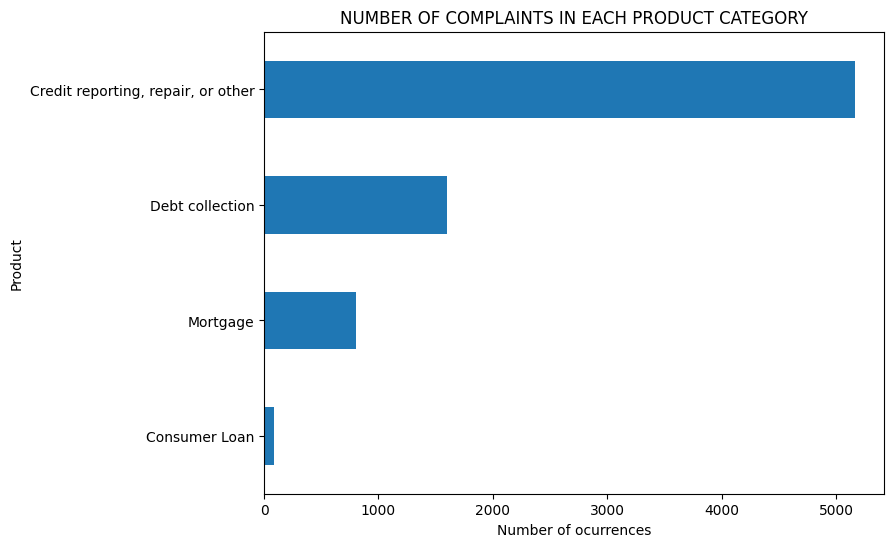

In [24]:
fig = plt.figure(figsize=(8,6))
a.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

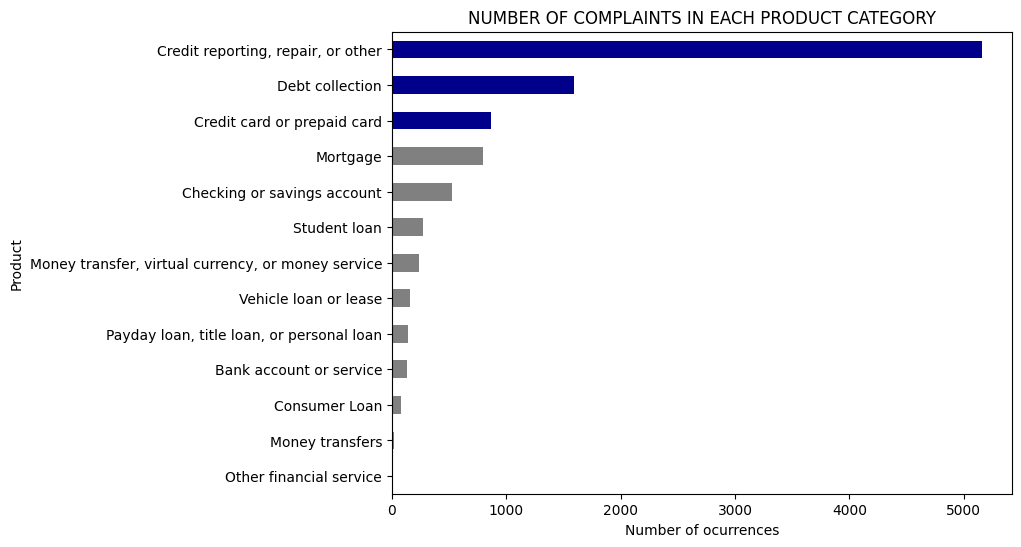

In [181]:
fig = plt.figure(figsize=(8,6))
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

# Text Preprocessing

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(a.Consumer_complaint).toarray()

labels = a.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [ ]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

In [89]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [93]:
# Models:

models = [LinearSVC(), MultinomialNB(),]

# 5 Cross-validation
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [94]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [95]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.4622,0.003960
MultinomialNB,0.5156,0.000283


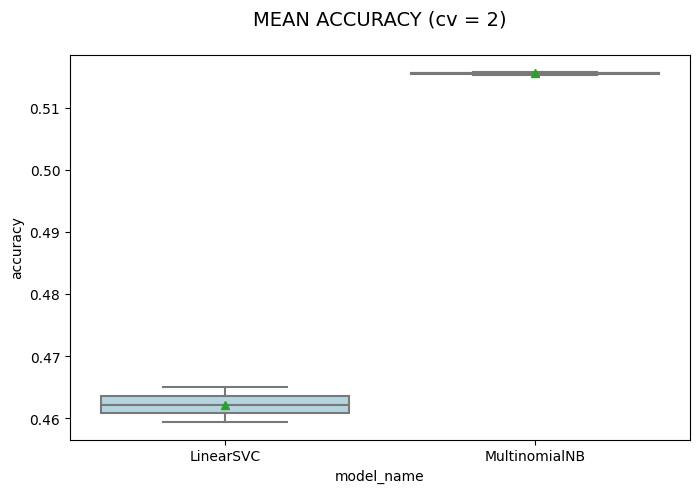

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 2)\n", size=14);

In [97]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [98]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                                     Consumer Loan       0.00      0.00      0.00        19
                Credit reporting, repair, or other       0.50      0.85      0.63      1249
                                   Debt collection       0.15      0.09      0.11       404
                       Checking or savings account       0.12      0.01      0.02       160
                                          Mortgage       0.12      0.02      0.04       205
                       Credit card or prepaid card       0.11      0.03      0.04       225
                             Vehicle loan or lease       0.00      0.00      0.00        48
                                      Student loan       0.00      0.00      0.00        61
Money transfer, virtual currency, or money service       0.00      0.00      0.00        53
         Payday loan, title loan, or personal loan

C:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

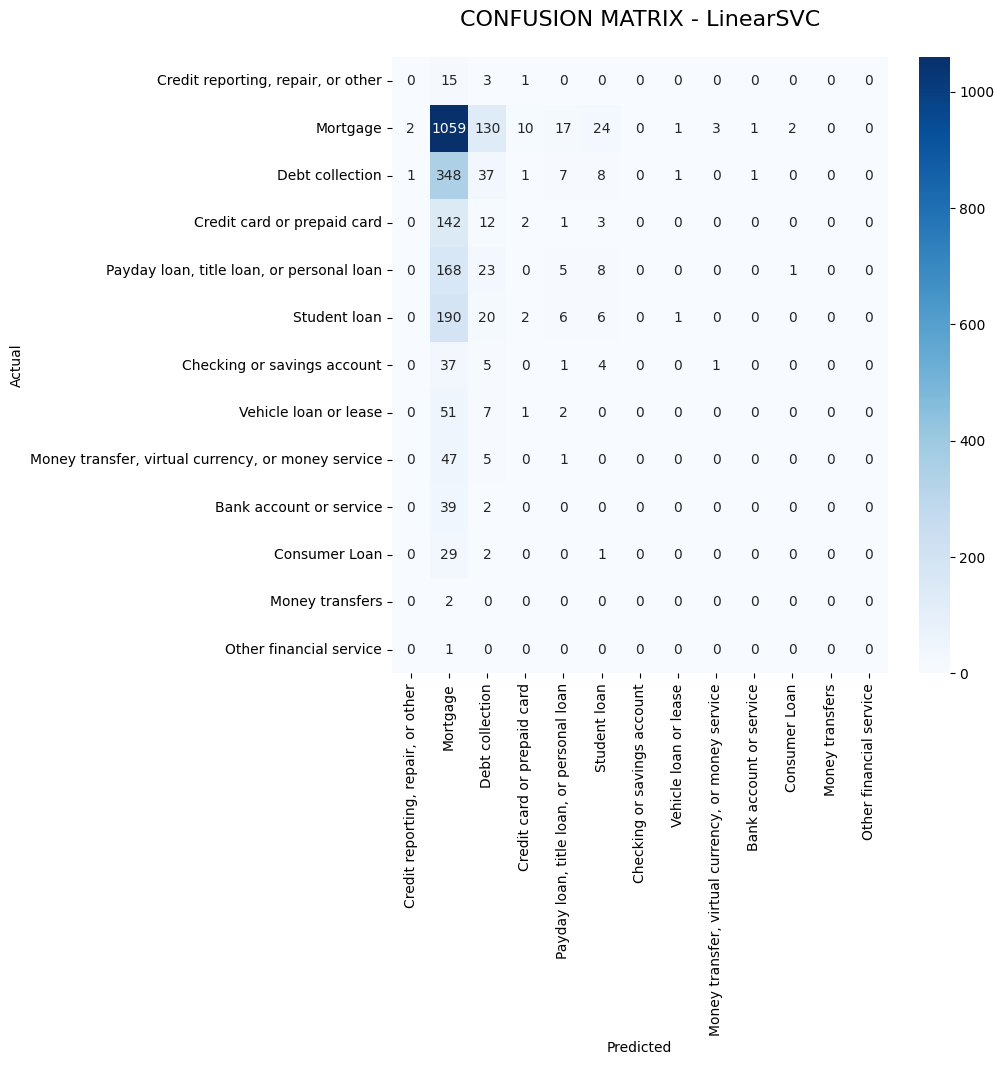

In [99]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [100]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 20:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
    
      display(df1.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
                                                                'Consumer_complaint']])
      print('')

'Debt collection' predicted as 'Mortgage' : 348 examples.


,Product,Consumer_complaint
375629,Debt collection,Im sending this complain to inform you departm...
1475973,Debt collection,* Letter and documentation attached to explain...
417606,Debt collection,XXXX XXXX XXXX is trying to collect a debt tha...
1207189,Debt collection,I don't remember that I had an account with th...
366809,Debt collection,I was making monthly payments to XXXX. I recei...
...,...,...
747102,Debt collection,I received a quote from XXXX XXXX for car ins...
2596124,Debt collection,I am XXXX XXXX and I am submitting this compla...
402430,Debt collection,I have sent numerous debt validation notices a...
2395191,Debt collection,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, SD XX..."



'Credit card or prepaid card' predicted as 'Mortgage' : 142 examples.


,Product,Consumer_complaint
697756,Checking or savings account,I signed up the XXXX checking account under fo...
825257,Checking or savings account,"Ok, I made a wireless payment on Friday XX/XX/..."
1543633,Checking or savings account,My account got suspended on the XXXX of XXXX. ...
1073007,Checking or savings account,M & T Bank XXXX XXXX XXXX has purchased Peopl...
226080,Checking or savings account,H & R block-Emerald Card was set to send me a ...
...,...,...
721231,Checking or savings account,Wrote check for {$13.00} dated XX/XX/2020. The...
275648,Checking or savings account,"Tuesday, XX/XX/XXXX Dear Consumer Finance Prot..."
931475,Checking or savings account,I was refused access to my online account beca...
853693,Checking or savings account,I opened a Citizen 's Platinum checking accoun...



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 168 examples.


,Product,Consumer_complaint
455028,Mortgage,"on XX/XX/2019, an attorney that represented Mi..."
3518953,Mortgage,XXXX XXXXXXXX has been Posting & Distributing ...
2994497,Mortgage,At the end of XXXX I obtained pre-approval for...
1262296,Mortgage,"Last year, I sold my primary residence. It was..."
2927985,Mortgage,Today is XXXX and I am writting regarding a lo...
...,...,...
1109764,Mortgage,On XX/XX/XXXX I sent a cashier check to pay of...
359831,Mortgage,Mid America Mortgage has cash my check for a p...
78501,Mortgage,Forebearance Program Release Delayed Since XX/...
3158823,Mortgage,Our mortgage lender is AXOS Bank. Our VA loan ...



'Student loan' predicted as 'Mortgage' : 190 examples.


,Product,Consumer_complaint
3389019,Credit card or prepaid card,I have had a credit card with synchrony bank f...
10944,Credit card or prepaid card,"In XXXX, I applied for a credit card with Capi..."
102036,Credit card or prepaid card,"CFPB, please do NOT close this case just becau..."
1568430,Credit card or prepaid card,I worked with my dentist office to get a servi...
3311518,Credit card or prepaid card,Capital one XXXX)\nXXXX bankXXXX\nCapital okne...
...,...,...
311070,Credit card or prepaid card,Macys American express credit card through Cit...
3219834,Credit card or prepaid card,Capital One Allowed a large purchase I did not...
2716938,Credit card or prepaid card,Capital one for 1 year well not take my calls ...
2185988,Credit card or prepaid card,They sent me an offer for a card I couldnt get...



'Checking or savings account' predicted as 'Mortgage' : 37 examples.


,Product,Consumer_complaint
1008338,Vehicle loan or lease,Requested SCRA benifits on XXXX XXXX from Flag...
3505462,Vehicle loan or lease,I made an overpayment on my account. The origi...
739897,Vehicle loan or lease,Kia Motors Finance. Request loan payoff early....
1712579,Vehicle loan or lease,Mercedes Benz Financial continues to make hara...
1407715,Vehicle loan or lease,I trade in my Toyota Lease into XXXX XXXX XX/X...
3263522,Vehicle loan or lease,XXXX contacted me today about my complaint I f...
493875,Vehicle loan or lease,I purchased the vehicle threw Westlake fin 6 m...
2627454,Vehicle loan or lease,I leased this car in NJ and paid the 6.625 % t...
1499206,Vehicle loan or lease,US Auto Sales is attempting to collect a debt ...
813771,Vehicle loan or lease,Loan was open in mid 2018. We lived in XXXX. I...



'Vehicle loan or lease' predicted as 'Mortgage' : 51 examples.


,Product,Consumer_complaint
1442898,Student loan,My loans for the past > 2 years have been unde...
2520183,Student loan,My problem is with National Collegiate Trusts....
2877731,Student loan,A debt collection agency has made repeated cal...
932072,Student loan,I filed a Identity Theft claim with this compa...
759310,Student loan,I have been a customer of XXXX for many years....
1558020,Student loan,I was eligible for forgiveness but there a ver...
1420493,Student loan,"On XXXX XXXX 2017, I received a phone call fro..."
1398778,Student loan,Forbearance needs to count towards XXXX- so ma...
1236836,Student loan,How are you doing during this chaotic time of ...
646533,Student loan,There is no way that these companies investiga...



'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 47 examples.


,Product,Consumer_complaint
846986,"Money transfer, virtual currency, or money ser...",I used XXXX to wire money to my ex girlfriend ...
1540200,"Money transfer, virtual currency, or money ser...",On XXXX XXXXXXXX XXXX I was robbed of my vehic...
1497313,"Money transfer, virtual currency, or money ser...",I am reaching out to you out of pure frustrati...
2579429,"Money transfer, virtual currency, or money ser...",I found an instagram seller with thousands of ...
2684629,"Money transfer, virtual currency, or money ser...",PNC will not allow me to link my bank account ...
491256,"Money transfer, virtual currency, or money ser...",I have a printing company and have been taking...
2783880,"Money transfer, virtual currency, or money ser...",In XX/XX/XXXX I received a collections letter ...
1453090,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX my friend had attempted to send ...
493540,"Money transfer, virtual currency, or money ser...",On XX/XX/19 a cash transfer of {$250.00} was s...
264816,"Money transfer, virtual currency, or money ser...",On XX/XX/2021I used PayPal to make two purchas...



'Bank account or service' predicted as 'Mortgage' : 39 examples.


,Product,Consumer_complaint
354475,"Payday loan, title loan, or personal loan","In XX/XX/XXXX, I found myself in a financial b..."
731900,"Payday loan, title loan, or personal loan","XX/XX/XXXX, I made a payment of {$140.00} towa..."
2245171,"Payday loan, title loan, or personal loan",XXXX FACTOR TRUST & XXXX XXXX XXXX I have repo...
229113,"Payday loan, title loan, or personal loan",This is my XXXX request to CFPB to file a comp...
1019293,"Payday loan, title loan, or personal loan",Today XXXX once again I would like to ask this...
109232,"Payday loan, title loan, or personal loan",On XX/XX/2022 I was issued a {$400.00} payday ...
482922,"Payday loan, title loan, or personal loan",On XX/XX/2022 wanted to order some books for {...
263535,"Payday loan, title loan, or personal loan",I contracted with XXXX in XXXX of XXXX to inst...
917312,"Payday loan, title loan, or personal loan","Hello, I took a loan of {$2500.00} back in XXX..."
1987592,"Payday loan, title loan, or personal loan",I applied for a personal loan on US Bank websi...



'Consumer Loan' predicted as 'Mortgage' : 29 examples.


,Product,Consumer_complaint
1083682,Bank account or service,I had a debit disputes that I lost. The agreem...
1934925,Bank account or service,I find it hard to believe that an FDIC Bank li...
2943661,Bank account or service,Wells Fargo refused the release estate account...
954210,Bank account or service,Wells Fargo bank discriminantly assesses fees ...
2894908,Bank account or service,Netspend on behalf of XXXX offers a Pre-Paid S...
1893892,Bank account or service,My name is XXXX XXXX earlier this year I filed...
1907897,Bank account or service,someone used my bank card link to my checking ...
2933164,Bank account or service,Huntington Banks has incorrect information tha...
3049237,Bank account or service,"wells fargo is the heridator, assignee, heir o..."
127512,Bank account or service,After a major robbery and idenitity theft issu...



'Mortgage' predicted as 'Debt collection' : 130 examples.


,Product,Consumer_complaint
1016864,"Credit reporting, repair, or other",On or About XX/XX/XXXX I XXXX XXXX did check m...
530616,"Credit reporting, repair, or other",Signed up for an online medical course in XX/X...
1525580,"Credit reporting, repair, or other","failure to provide proof of late payments, was..."
290445,"Credit reporting, repair, or other",I am a victim of Identity theft and there is i...
2371116,"Credit reporting, repair, or other",In accordance with the Fair Credit Reporting a...
...,...,...
1354615,"Credit reporting, repair, or other","On XX/XX/2022, I sent a letter regarding inacc..."
903281,"Credit reporting, repair, or other","Despite multiple written requests, the erroneo..."
237306,"Credit reporting, repair, or other",I have disputed many times with XXXX about my...
1464936,"Credit reporting, repair, or other",I was in the process of purchasing a car for m...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 23 examples.


,Product,Consumer_complaint
3404426,Mortgage,I have tried multiple times to get help from X...
813723,Mortgage,"XXXX XXXX XXXX XXXX XXXX XXXX , N..."
423445,Mortgage,Gregory Funding bought my loan from XXXX XXXX ...
1685002,Mortgage,We have been trying to get a modification on a...
996778,Mortgage,in a letter dated XX/XX/2020 you state details...
590348,Mortgage,I was referred to Cornerstone Mortgage Group f...
147307,Mortgage,I filed a complaint with the CFPB on XX/XX/XXX...
1842595,Mortgage,I sent a request for information to Select Por...
885924,Mortgage,I've been have issues with XXXX/ Loancare sinc...
89366,Mortgage,Wells Fargo flagged my credit for a late payme...



'Student loan' predicted as 'Debt collection' : 20 examples.


,Product,Consumer_complaint
2339934,Credit card or prepaid card,Genesis FS Card Services XXXX XXXX Credit Card...
443786,Credit card or prepaid card,XXXXFor a while I thought XXXX XXXX XXXX XXXX ...
2327838,Credit card or prepaid card,Chase has and continues to promote My Chase Pl...
1190897,Credit card or prepaid card,I used my HSBC credit card to purchase airline...
762516,Credit card or prepaid card,My XXXX XXXX XXXX XXXX XXXX Credit Card has be...
1906945,Credit card or prepaid card,This is an account I never applied for and I d...
1258161,Credit card or prepaid card,I want this late payment deleted from my accou...
1361691,Credit card or prepaid card,I made an online purchase for a 24 foot ladder...
1362184,Credit card or prepaid card,COVID Complaint As I stated in a previous comp...
291596,Credit card or prepaid card,"On XX/XX/10, I decided to apply for the Discov..."



'Mortgage' predicted as 'Student loan' : 24 examples.


,Product,Consumer_complaint
277076,"Credit reporting, repair, or other",I paid all my payments before the 30 days and ...
1810477,"Credit reporting, repair, or other",The unverified items indicated below continue ...
55259,"Credit reporting, repair, or other",I have contacted XXXX multiple times in regard...
567868,"Credit reporting, repair, or other",I submitted a letter to the 3 Credit Bureaus X...
729274,"Credit reporting, repair, or other","In XXXX, XXXX I submitted a FTC REPORT due to ..."
1365341,"Credit reporting, repair, or other",Hi I am submitting this XXXX XXXX this isn't a...
97265,"Credit reporting, repair, or other",Experian has a Bankruptcy listed on my credit ...
1999275,"Credit reporting, repair, or other",I was taken advantage of due to malpractice wh...
2398178,"Credit reporting, repair, or other","On XX/XX/XXXX a dispute letter was sent out, h..."
763282,"Credit reporting, repair, or other",I have a public record entry that was placed o...


In [102]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Bank account or service':
  * Top unigrams: equity, 540, dpt, affordable
  * Top bigrams: disputing incorrect, agency xxxx, debt refuse, account inquiries

==> 'Checking or savings account':
  * Top unigrams: junk, cell, showed, visa
  * Top bigrams: xxxx used, xxxx live, want contact, identity used

==> 'Consumer Loan':
  * Top unigrams: businesses, exhibits, judgements, reporting
  * Top bigrams: report balance, creditor listed, accounts reporting, incorrect account

==> 'Credit card or prepaid card':
  * Top unigrams: pennymac, hacking, married, account
  * Top bigrams: knowledge xxxx, ftc violations, calling company, help xxxx

==> 'Credit reporting, repair, or other':
  * Top unigrams: effect, universal, overpayment, canceling
  * Top bigrams: initiated xx, account close, shows closed, authorize credit

==> 'Debt collection':
  * Top unigrams: constant, settlement, court, connect
  * Top bigrams: care credit, account remove, account fraudulently, did know

==> 'Money transfe

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [144]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Credit reporting, repair, or other']
